## Q2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('laptop_price - dataset.csv')

<u>Plot the price of all the laptops</u>

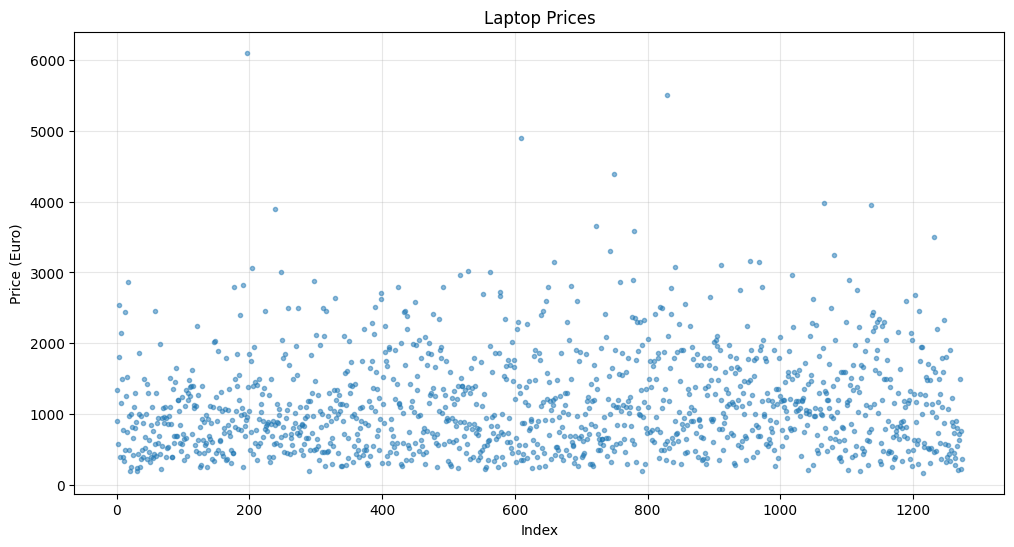

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price (Euro)'], marker='.', linestyle='none', alpha=0.5)
plt.title('Laptop Prices')
plt.xlabel('Index')
plt.ylabel('Price (Euro)')
plt.grid(True, alpha=0.3)
plt.show()

<u>What is the average laptop price for each company?</u>

In [5]:
grouped_companies = df.groupby('Company')  
prices_by_company = grouped_companies['Price (Euro)']  
company_averages = prices_by_company.mean().sort_values(ascending=False)
print("\nAverage laptop price by company:", company_averages)


Average laptop price by company: Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


<u>Which company has on average the most expensive laptop? </u>

In [6]:
print(f"\nMost expensive company on average: {company_averages.index[0]}")


Most expensive company on average: Razer


<u>Find the different types of Operating systems present in the data</u>

In [7]:
# Merging all the varients into one category
def clean_os(os):
    os = os.lower()
    if 'mac' in os:
        return 'macOS'
    elif 'windows' in os:
        return 'Windows'
    elif 'no os' in os:
        return 'No OS'
    else:
        return os

# Cleaning and then counting all the different categories
df['OpSys'] = df['OpSys'].apply(clean_os)
unique_os = df['OpSys'].unique()
print("\nUnique Operating Systems:", unique_os)


Unique Operating Systems: ['macOS' 'No OS' 'Windows' 'linux' 'android' 'chrome os']


<u>Plot for each of the operating system types the distribution of the prices</u></p>
so that the number of plots equals to the number of unique operating systems.

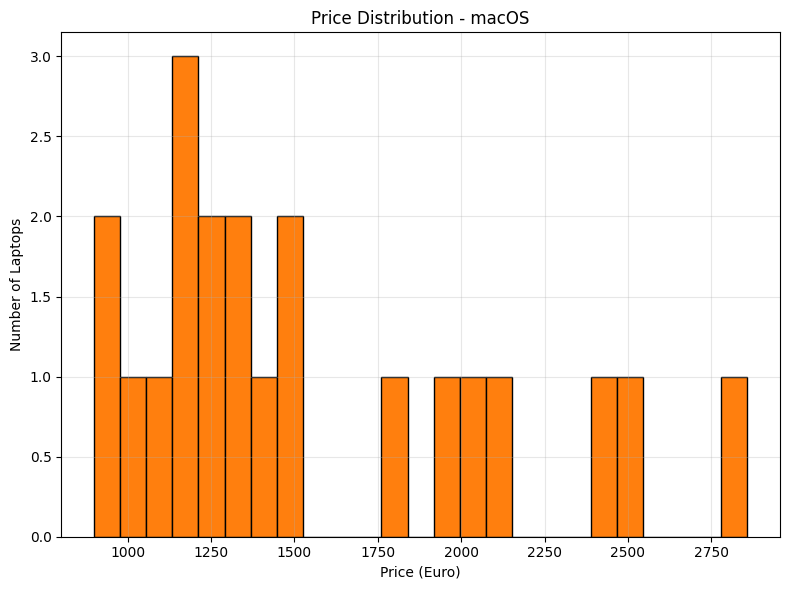

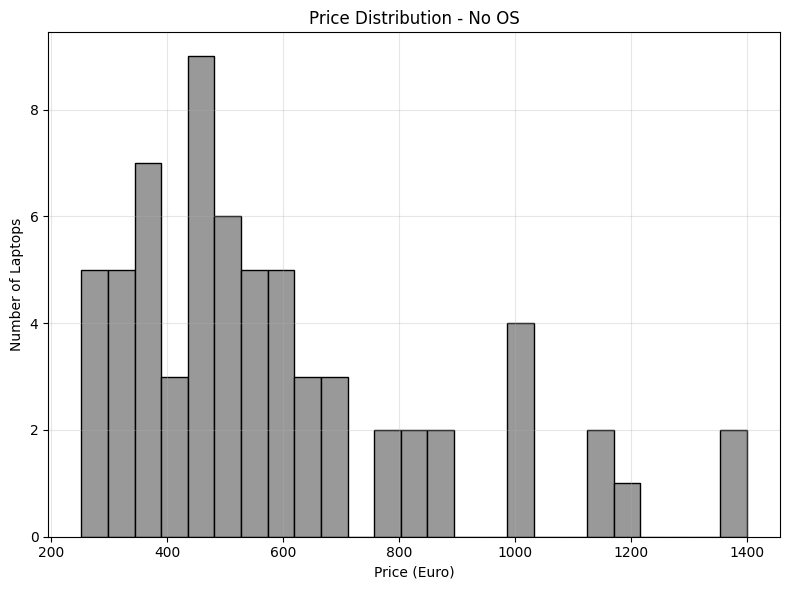

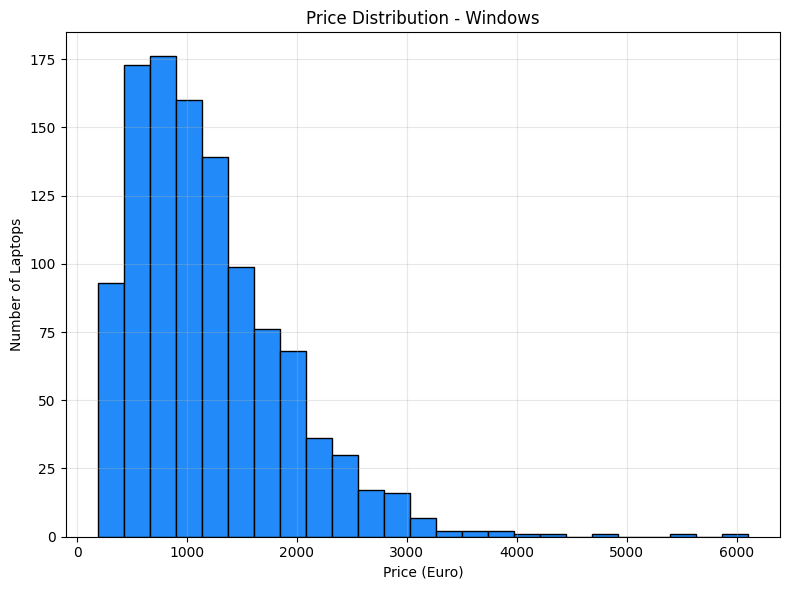

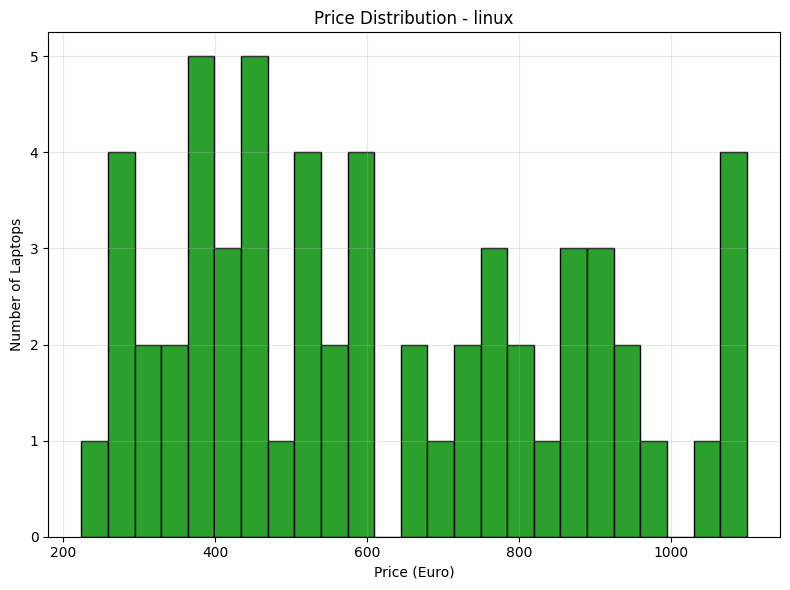

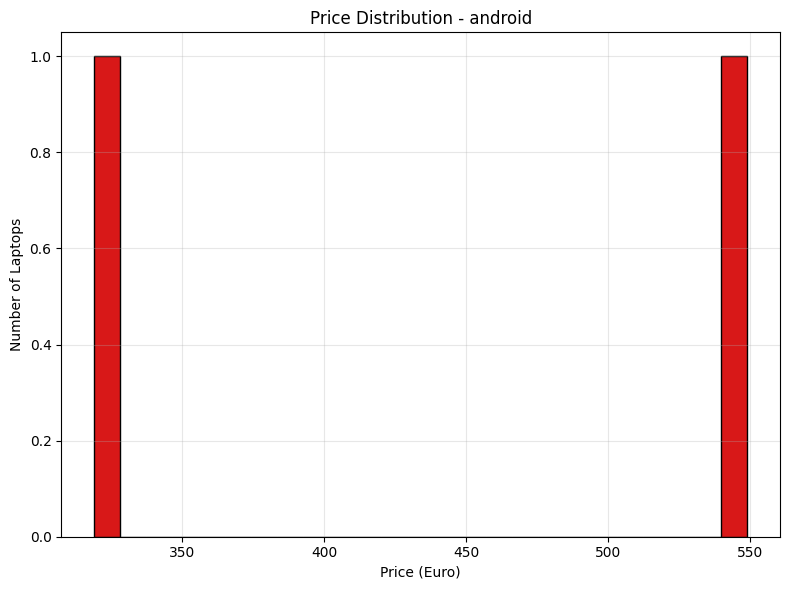

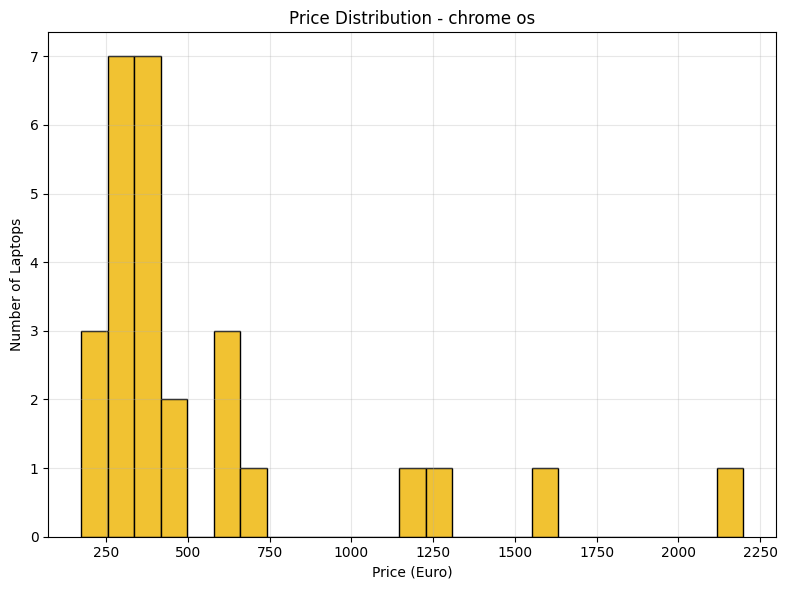

In [8]:
# Different colors for each OS for ease of telling them apart in a glance
colors = ['#ff7f0e','#999999','#228bf9','#2ca02c','#d81818','#f1c232']

# Creating a plot for each OS
for i, os_name in enumerate(unique_os):
    os_data = df[df['OpSys'] == os_name]['Price (Euro)']
    
    plt.figure(figsize=(8, 6))
    plt.hist(os_data, bins=25, edgecolor='black', linewidth=1, color=colors[i])
    
    plt.title(f'Price Distribution - {os_name}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Number of Laptops')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


<u>What is the relationship between RAM and computer price?</u>

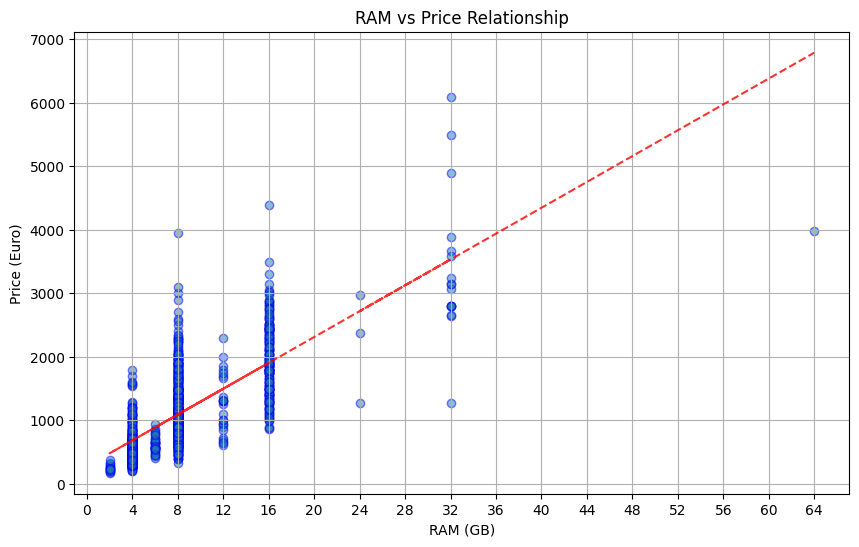

In [9]:
# Creating a basic scatter plot for RAM and price
plt.figure(figsize=(10, 6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'],alpha=0.5,edgecolor='blue')
plt.title('RAM vs Price Relationship')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.xticks(np.arange(0, 65, 4))
plt.grid(True)

# Adding trend line
coefficients = np.polyfit(df['RAM (GB)'], df['Price (Euro)'], 1)
polynomial = np.poly1d(coefficients)
x_values = df['RAM (GB)'].unique()
plt.plot(x_values, polynomial(x_values), "r--", alpha=0.8)
plt.show()

We can see that there's a linear relationship between the amount of RAM and them price, where the computer has a higher price the more RAM it has.

<u>Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory"</u>

In [ ]:
df['Storage type'] = df['Memory'].str.extract(r'(SSD|HDD|SSD + HDD|Hybrid|Flash Storage)')
print(df[['Memory', 'Storage type']].head(30))

#  FIGURE SOMETHING OUT FOR ROWS WITH TWO TYPES!!!

                    Memory   Storage type
0                128GB SSD            SSD
1      128GB Flash Storage  Flash Storage
2                256GB SSD            SSD
3                512GB SSD            SSD
4                256GB SSD            SSD
5                500GB HDD            HDD
6      256GB Flash Storage  Flash Storage
7      256GB Flash Storage  Flash Storage
8                512GB SSD            SSD
9                256GB SSD            SSD
10               500GB HDD            HDD
11               500GB HDD            HDD
12               256GB SSD            SSD
13               256GB SSD            SSD
14               256GB SSD            SSD
15               256GB SSD            SSD
16               256GB SSD            SSD
17               512GB SSD            SSD
18                 1TB HDD            HDD
19               128GB SSD            SSD
20      32GB Flash Storage  Flash Storage
21    128GB SSD +  1TB HDD            SSD
22               500GB HDD        